Módulo: Machine Learning<br>
Professor: Helder Vieira<br>
Data: 11/2021

# Aula 02 - KNN - Exercícios

## Exercício 1

Utilizando o dataset breast_cancer_train.csv, desenvolva um modelo KNN (utilizando o sklearn) com o objetivo de prever se o resultado de uma biópsia indica a presença de câncer malígno. Procure fazer com que o seu o modelo não apresente **overfitting** e maximize a acurácia.

Ao final, reporte:

1 - A acurácia, precisão e recall do seu modelo na base utilizada para treino e validação    
2 - A acurácia, precisão e recall do seu modelo na base breast_cancer_test.csv  
3 - O K escolhido    
4 - Qual é a variável mais importante no processo de decisão? Você pode usar uma árvore para responder      

### Carregando e visualizando os dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_breast_cancer = pd.read_csv('breast_cancer_train.csv')
df_breast_cancer.shape

(455, 32)

In [3]:
display(df_breast_cancer.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,857156,B,13.49,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,...,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
1,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,88330202,M,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,...,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
3,88203002,B,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
4,892189,M,11.76,18.14,75.00,431.1,0.09968,0.05914,0.026850,0.035150,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915


In [4]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       455 non-null    int64  
 1   diagnosis                455 non-null    object 
 2   radius_mean              455 non-null    float64
 3   texture_mean             455 non-null    float64
 4   perimeter_mean           455 non-null    float64
 5   area_mean                455 non-null    float64
 6   smoothness_mean          455 non-null    float64
 7   compactness_mean         455 non-null    float64
 8   concavity_mean           455 non-null    float64
 9   concave points_mean      455 non-null    float64
 10  symmetry_mean            455 non-null    float64
 11  fractal_dimension_mean   455 non-null    float64
 12  radius_se                455 non-null    float64
 13  texture_se               455 non-null    float64
 14  perimeter_se             4

In [5]:
# Estatísticas descritivas
df_breast_cancer.drop('id', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,13.934690,3.378626,6.981000,11.625000,13.240000,15.680000,28.11000
texture_mean,455.0,19.213209,4.263837,9.710000,16.170000,18.700000,21.585000,39.28000
perimeter_mean,455.0,90.652088,23.245163,43.790000,74.665000,85.790000,103.300000,188.50000
area_mean,455.0,635.199780,330.983856,143.500000,413.900000,541.800000,761.500000,2499.00000
smoothness_mean,455.0,0.096140,0.013853,0.052630,0.086025,0.095160,0.105200,0.16340
compactness_mean,455.0,0.103078,0.051409,0.023440,0.064130,0.091820,0.128350,0.34540
concavity_mean,455.0,0.086932,0.077409,0.000000,0.029570,0.061550,0.120400,0.42640
concave points_mean,455.0,0.047277,0.037436,0.000000,0.020125,0.033230,0.068095,0.19130
symmetry_mean,455.0,0.180614,0.027027,0.106000,0.161850,0.178800,0.194550,0.30400
fractal_dimension_mean,455.0,0.062879,0.007033,0.049960,0.057985,0.061550,0.066100,0.09575


### Tratamento dos dados

In [6]:
# Gerando X e y
X = df_breast_cancer.drop(['id','diagnosis'], axis=1)
y = df_breast_cancer['diagnosis']
print(X.shape, y.shape)

(455, 30) (455,)


In [7]:
# Tratamento das features: normalizar a escala dos dados
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X)

X = sc.transform(X)

X

array([[-0.13176349,  0.72474362, -0.1611607 , ...,  0.23706894,
        -0.03359649, -0.82687561],
       [-0.27695249,  0.61204506, -0.13575114, ...,  1.44536368,
         2.44559068,  1.24889063],
       [ 1.04456371,  4.71145533,  0.97968557, ...,  1.45468215,
        -0.06320854,  0.03497948],
       ...,
       [-1.29416441, -0.77555602, -1.31105106, ..., -0.63234417,
        -0.22113951, -0.13859235],
       [ 0.30084046, -0.10406041,  0.3095622 , ..., -0.44861503,
        -0.06485366,  0.42906395],
       [ 1.43272206,  0.52047747,  1.38882259, ...,  1.42672674,
         1.29565582,  0.78494078]])

In [8]:
# Separando os conjuntos de treino e validação
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(318, 30) (318,)
(137, 30) (137,)


### Testando modelos

In [9]:
# Importando bilbioteca
from sklearn.neighbors import KNeighborsClassifier
# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


In [10]:
# Algoritmo para testar diversos valores de K vizinhos
valores_k = []
taxa_overfit = []

for k in range(1, 15):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    
    y_train_pred = modelo.predict(X_train)

    y_valid_pred = modelo.predict(X_valid)
    
    acc_train = accuracy_score(y_train, y_train_pred)
    prec_train = precision_score(y_train, y_train_pred,pos_label=y.unique().all())
    rec_train = recall_score(y_train, y_train_pred,pos_label=y.unique().all())

    acc_valid = accuracy_score(y_valid, y_valid_pred)
    prec_valid = precision_score(y_valid, y_valid_pred,pos_label=y.unique().all())
    rec_valid = recall_score(y_valid, y_valid_pred,pos_label=y.unique().all())
    
    valores_k.append(k)
    taxa_overfit.append(acc_train-acc_valid)

    print('\n##############\n')
    print(f'Treino k={k}:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
    print(f'Validação k={k}:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')


##############

Treino k=1:
Acc: 1.00, Precision: 1.00, Recall: 1.00
Validação k=1:
Acc: 0.97, Precision: 0.98, Recall: 0.94

##############

Treino k=2:
Acc: 0.97, Precision: 1.00, Recall: 0.93
Validação k=2:
Acc: 0.97, Precision: 1.00, Recall: 0.92

##############

Treino k=3:
Acc: 0.98, Precision: 1.00, Recall: 0.96
Validação k=3:
Acc: 0.99, Precision: 1.00, Recall: 0.98

##############

Treino k=4:
Acc: 0.97, Precision: 1.00, Recall: 0.92
Validação k=4:
Acc: 0.99, Precision: 1.00, Recall: 0.96

##############

Treino k=5:
Acc: 0.97, Precision: 1.00, Recall: 0.92
Validação k=5:
Acc: 0.99, Precision: 1.00, Recall: 0.98

##############

Treino k=6:
Acc: 0.97, Precision: 1.00, Recall: 0.92
Validação k=6:
Acc: 0.99, Precision: 1.00, Recall: 0.96

##############

Treino k=7:
Acc: 0.97, Precision: 1.00, Recall: 0.93
Validação k=7:
Acc: 0.98, Precision: 0.98, Recall: 0.96

##############

Treino k=8:
Acc: 0.97, Precision: 1.00, Recall: 0.93
Validação k=8:
Acc: 0.98, Precision: 0.98, Recal

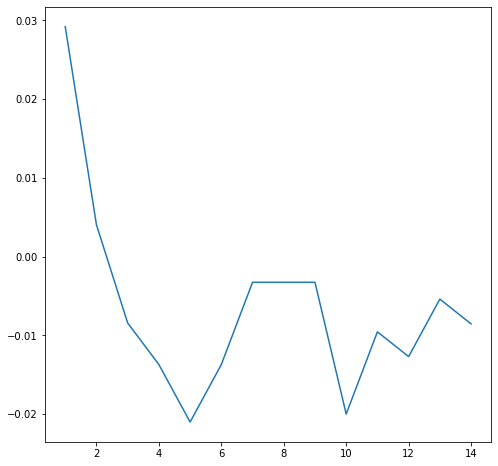

In [11]:
# Gráfico da taxa de overfitting
plt.figure(figsize=(8,8))

plt.plot(valores_k, taxa_overfit)

plt.show()

**Nota:** Desempenho melhor na validação acontece com datasets pequenos

In [12]:
# Modelo escolhido: k=2
modelo = KNeighborsClassifier(n_neighbors=2)

modelo.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [13]:
# Preditos de treino e validação
y_train_pred = modelo.predict(X_train)

y_valid_pred = modelo.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(318,) (137,)


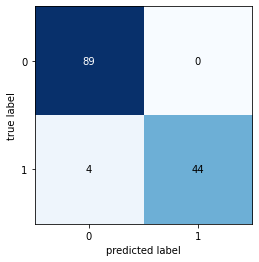

In [14]:
# Matriz de confusão: validação

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm);

In [15]:
# Métricas
#from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred,pos_label=y.unique().all())
rec_train = recall_score(y_train, y_train_pred,pos_label=y.unique().all())

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred,pos_label=y.unique().all())
rec_valid = recall_score(y_valid, y_valid_pred,pos_label=y.unique().all())

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.97, Precision: 1.00, Recall: 0.92
Validação:
Acc: 0.97, Precision: 1.00, Recall: 0.92


### Teste do modelo

In [16]:
# Carregando dataset de teste
df_breast_cancer_test = pd.read_csv('breast_cancer_test.csv')
print('Shape:', df_breast_cancer_test.shape)
display(df_breast_cancer_test.head())

Shape: (114, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
1,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
2,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
3,846226,M,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
4,855133,M,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504


In [17]:
# Separando as features de teste
X_test = df_breast_cancer_test.drop(['id','diagnosis'], axis=1)

In [18]:
# Normalização das features a partir do fit feito no conjunto de treino
X_test = sc.transform(X_test)
X_test

array([[-0.74511294,  0.27394936, -0.56297632, ...,  2.24519889,
         6.16354888,  4.84040835],
       [ 1.88310426, -1.14417424,  1.91424066, ...,  0.76977472,
        -0.86766941, -0.41150403],
       [-0.43991974, -0.82486164, -0.34807172, ...,  0.94993177,
         1.79906078,  2.18770682],
       ...,
       [-0.83104113,  0.75761403, -0.82525469, ..., -0.75798819,
         0.45664756, -0.21828256],
       [-0.71844558,  1.10744916, -0.69476151, ..., -0.25479089,
        -1.2822382 ,  0.16379379],
       [ 2.06977583,  1.37980403,  2.25447039, ...,  2.19394731,
         0.06182014,  0.78657825]])

In [19]:
# Calculando os preditos do teste em uma coluna do DF teste
df_breast_cancer_test['Predict'] = modelo.predict(X_test)

In [20]:
df_breast_cancer_test[['diagnosis','Predict']].head(10)

,diagnosis,Predict
0,M,M
1,M,M
2,M,M
3,M,M
4,M,B
5,B,B
6,B,B
7,M,M
8,B,B
9,B,B


In [21]:
# Métricas do teste

acc_test = accuracy_score(df_breast_cancer_test['diagnosis'], df_breast_cancer_test['Predict'])
prec_test = precision_score(df_breast_cancer_test['diagnosis'], df_breast_cancer_test['Predict'],pos_label=y.unique().all())
rec_test = recall_score(df_breast_cancer_test['diagnosis'], df_breast_cancer_test['Predict'],pos_label=y.unique().all())

print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Teste:
Acc: 0.96, Precision: 0.98, Recall: 0.92


In [22]:
# Visualizando os parâmetros do modelo
modelo.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

### Retomando o exercício
Ao final, reporte:

1 - A acurácia, precisão e recall do seu modelo na base utilizada para treino e validação    
2 - A acurácia, precisão e recall do seu modelo na base breast_cancer_test.csv  
3 - O K escolhido    
4 - Qual é a variável mais importante no processo de decisão? Você pode usar uma árvore para responder      

In [23]:
print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')
print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')
print('Modelo com k=2')

Treino:
Acc: 0.97, Precision: 1.00, Recall: 0.92
Validação:
Acc: 0.97, Precision: 1.00, Recall: 0.92
Teste:
Acc: 0.96, Precision: 0.98, Recall: 0.92
Modelo com k=2


### Qual a variável mais importante?

* A partir de um modelo KNN, não conseguimos identificar prontamente qual variável foi a mais importante. 
* A partir dos dados, também é complexo identificar qual a variável mais importante. Uma análise de correlação mostraria somente relações lineares entre feature e target, mas muitas vezes as relações podem ser não lineares.
* Para identificarmos a importância das variáveis, precisamos de usar outro tipo de modelo, por exemplo, uma árvore de decisão, a qual é capaz de captar relações não lineares
* Outra heurística seria testar o modelo retirando cada variável e verificando o decaimento na acurácia.
* Sugestão do professor: retirar variáveis e avaliar o impacto no desempenho. 

In [24]:
# Algoritmo para testar a retirada de cada variável e seu impacto no desempenho em TESTE
features_names = df_breast_cancer.drop(['id','diagnosis'], axis=1).columns # nome das features
y_test = df_breast_cancer_test['diagnosis'] # target do conjunto teste
delta_acc = [] # lista para guardar diferença entre acurácias

for i in range(X_test.shape[1]): # para cada coluna do numpy array X_test
    teste = X_test.copy() # copia array original
    teste[:,i] = np.zeros(teste.shape[0]) # zera a coluna i
    y_test_2 = modelo.predict(teste) # gera preditos
    
    acc_test_2 = accuracy_score(y_test, y_test_2)
    delta = acc_test_2 - acc_test
    delta_acc.append(delta)
    
    if delta < 0: # Quando houve queda no desempenho, print:
        print('Feature:',features_names[i])
        print(f'Test Acc: {acc_test:.4f}, Test_2 Acc: {acc_test_2:.4f}')
        print('Delta',delta)
        print('---------------------------------------')

Feature: texture_mean
Test Acc: 0.9561, Test_2 Acc: 0.9474
Delta -0.00877192982456143
---------------------------------------
Feature: concave points_mean
Test Acc: 0.9561, Test_2 Acc: 0.9474
Delta -0.00877192982456143
---------------------------------------
Feature: symmetry_mean
Test Acc: 0.9561, Test_2 Acc: 0.9386
Delta -0.01754385964912275
---------------------------------------
Feature: perimeter_se
Test Acc: 0.9561, Test_2 Acc: 0.9474
Delta -0.00877192982456143
---------------------------------------
Feature: compactness_se
Test Acc: 0.9561, Test_2 Acc: 0.9474
Delta -0.00877192982456143
---------------------------------------
Feature: concave points_se
Test Acc: 0.9561, Test_2 Acc: 0.9386
Delta -0.01754385964912275
---------------------------------------
Feature: symmetry_se
Test Acc: 0.9561, Test_2 Acc: 0.9474
Delta -0.00877192982456143
---------------------------------------
Feature: radius_worst
Test Acc: 0.9561, Test_2 Acc: 0.9386
Delta -0.01754385964912275
------------------

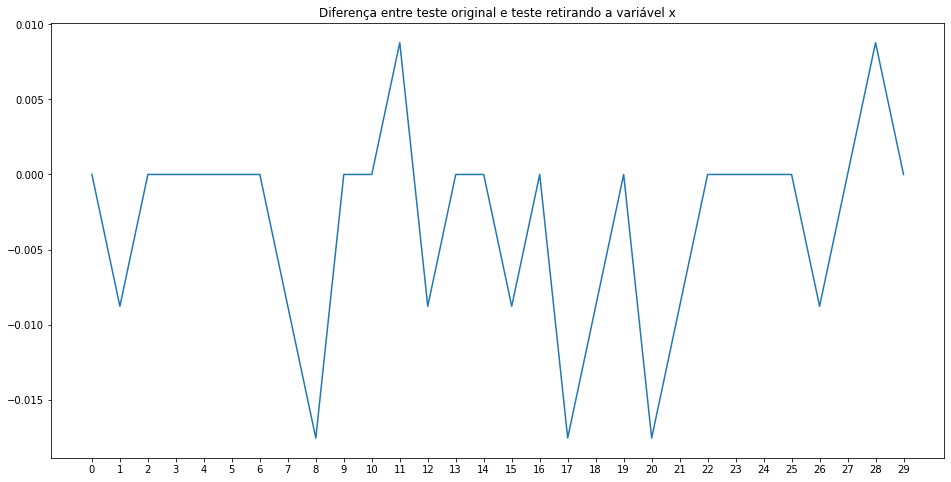

In [25]:
# Gráfico da diferença
plt.figure(figsize=(16,8))
plt.plot(delta_acc)
plt.xticks(np.arange(0,30,1))
plt.title('Diferença entre teste original e teste retirando a variável x');

**Obs.:** Pelo gráfico, podemos ver que a retirada da variável 11 e 28 impactam positivamente o funcionamento do modelo em teste

In [26]:
# Pontos máximos
maximos = [i for i, x in enumerate(delta_acc) if x == max(delta_acc)]
print('Pontos máximos:', maximos)
print('Features:', list(features_names[maximos]))

Pontos máximos: [11, 28]
Features: ['texture_se', 'symmetry_worst']


In [27]:
# Pontos mínimos
minimos = [i for i, x in enumerate(delta_acc) if x == min(delta_acc)]
print('Pontos mínimos:', minimos)
print('Features:', list(features_names[minimos]))

Pontos mínimos: [8, 17, 20]
Features: ['symmetry_mean', 'concave points_se', 'radius_worst']


**Resposta:** Para identificar a variável mais importante para esse modelo KNN, usamos a heurística de zerar os valores de cada variável e verificar seu impacto na acurácia do teste. Por esse método, identificamos que as variáveis 'symmetry_mean', 'concave points_se', 'radius_worst' foram as mais importantes para o desempenho do modelo em teste.

### Utilizando uma árvore de decisão

Aqui, iremos utilizar um outro modelo (uma árvore de classificação) para extrair a importância das variáveis através do método .feature_importances_ 

In [28]:
# Criando e rodando uma árvore de decisão
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8)
arvore.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8)

In [29]:
# Gerando os preditos de treino e validação
y_train_pred = arvore.predict(X_train)
y_valid_pred = arvore.predict(X_valid)

In [30]:
# Comparando métricas de treino e validação
tree_acc_train = accuracy_score(y_train, y_train_pred)
tree_prec_train = precision_score(y_train, y_train_pred,pos_label=y.unique().all())
tree_rec_train = recall_score(y_train, y_train_pred,pos_label=y.unique().all())

tree_acc_valid = accuracy_score(y_valid, y_valid_pred)
tree_prec_valid = precision_score(y_valid, y_valid_pred,pos_label=y.unique().all())
tree_rec_valid = recall_score(y_valid, y_valid_pred,pos_label=y.unique().all())

print(f'Train:\nAcc: {tree_acc_train:.2f}, Precision: {tree_prec_train:.2f}, Recall: {tree_rec_train:.2f}')
print(f'Validation:\nAcc: {tree_acc_valid:.2f}, Precision: {tree_prec_valid:.2f}, Recall: {tree_rec_valid:.2f}')

Train:
Acc: 0.97, Precision: 0.99, Recall: 0.91
Validation:
Acc: 0.96, Precision: 0.98, Recall: 0.90


In [31]:
arvore.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01599563, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03857127, 0.77414449, 0.        , 0.        ,
       0.        , 0.00175902, 0.16952959, 0.        , 0.        ])

In [32]:
np.argmax(arvore.feature_importances_)

22

In [33]:
importances = pd.DataFrame(data=arvore.feature_importances_,
                           index=features_names,
                           columns=['Importance'])

importances[importances['Importance']>0].sort_values(by='Importance', ascending=False)

,Importance
perimeter_worst,0.774144
concave points_worst,0.169530
texture_worst,0.038571
area_se,0.015996
concavity_worst,0.001759


**Obs.:** Utilizando uma árvore de decisão de profundidade 3, a feature mais importante é 'perimeter_worst'. Vejamos abaixo o plot da árvore.

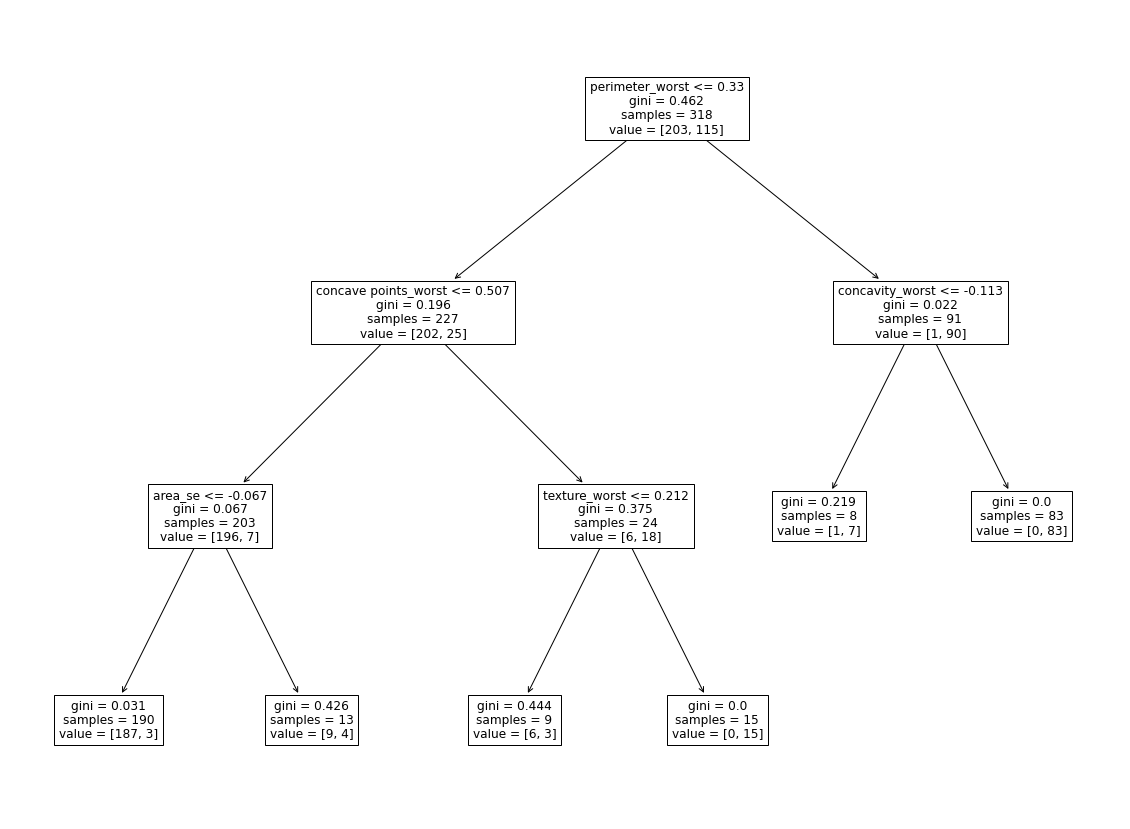

In [34]:
# Visualizção da árvore
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(arvore, feature_names=df_breast_cancer.drop(['id','diagnosis'], axis=1).columns);

## Exercício 2

Utilizando o dataset movies_data.csv, desenvolva um modelo que, dada a escolha de um filme, apresente uma sugestão com os 3 filmes mais parecidos.

**Dica**: adapte a classe KNN_Custom, vista na aula, para resolver esse problema.

### Carregando e visualizando os dados

In [35]:
df_movies = pd.read_csv('movies_data.csv')
print(df_movies.shape)
display(df_movies.head())

(30, 10)


,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,Forrest Gump,8.8,0,1,0,0,0,0,0,0


In [36]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Name   30 non-null     object 
 1   IMDB Rating  30 non-null     float64
 2   Biography    30 non-null     int64  
 3   Drama        30 non-null     int64  
 4   Thriller     30 non-null     int64  
 5   Comedy       30 non-null     int64  
 6   Crime        30 non-null     int64  
 7   Mystery      30 non-null     int64  
 8   History      30 non-null     int64  
 9   Label        30 non-null     int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 2.5+ KB


### Modelo KNN customizado

In [37]:
# A classe KNN_Custom implementa uma KNN customizada para identificar
# filmes semelhantes a partir de um dado filme que podem ser usados 
# para dar recomendações aos usuários

import numpy as np
from scipy import stats

# Definição da nossa classe

class KNN_Custom:
    
    def __init__(self, k, data):
        # Inicializando nosso modelo
        
        self._k = k
        self._data = data.copy()
        
    def predict(self, movie, features):
        
        # Garantimos que estamos tratando uma array do numpy
        X = self._data.loc[self._data['Movie Name'] == movie, features].to_numpy().reshape(-1)
        
        # Criamos nossa tabela de distâncias
        self._dist_table = pd.DataFrame(columns=['sample_index', 'distance'])
        
        # Iteramos sobre todos os pontos
        for i in range(len(self._data)):
            # Selecionamos o ponto atual
            ponto_atual = self._data[features].iloc[i].to_numpy()
            
            # Calculamos a distância
            dist = np.linalg.norm(X-ponto_atual)
            
            # Adicionamos o valos à tabela
            self._dist_table = self._dist_table.append({'sample_index': i, 'distance': dist}, ignore_index=True)
        
        
        # Ordenamos a tabela pela distância
        self._dist_table = self._dist_table.sort_values('distance')
        
        # Selecionamos os índices com as K menores distâncias
        self._vetor_indices = self._dist_table.sort_values('distance')['sample_index'].to_numpy()[1:self._k + 1]
        
        # Retornamos a moda das categorias selecionadas
        return self._data.loc[self._vetor_indices, 'Movie Name']
    
    def __repr__(self):
        return f'KNN implementado manualmente! K={self._k}'
            

In [38]:
# O método predict tem uma lista de features como argumento
features = list(df_movies.drop('Movie Name', axis=1).columns)
features

['IMDB Rating',
 'Biography',
 'Drama',
 'Thriller',
 'Comedy',
 'Crime',
 'Mystery',
 'History',
 'Label']

In [39]:
# Criando o modelo
modelo = KNN_Custom(k=3, data=df_movies)
modelo

KNN implementado manualmente! K=3

In [40]:
# O predict retorna os 3 filmes mais próximos
print(modelo.predict('Forrest Gump', features))

12.0         Interstellar
3.0     Good Will Hunting
15.0            Inception
Name: Movie Name, dtype: object


In [41]:
for movie in df_movies['Movie Name']:
    print('Nome do filme:', movie)
    print('Recomendações semelhantes:')
    print(modelo.predict(movie, features))
    print('------------------------------------')

Nome do filme: The Imitation Game
Recomendações semelhantes:
2.0     A Beautiful Mind
16.0      The Wind Rises
29.0      Queen of Katwe
Name: Movie Name, dtype: object
------------------------------------
Nome do filme: Ex Machina
Recomendações semelhantes:
6.0                Gifted
21.0    Stand and Deliver
18.0    Finding Forrester
Name: Movie Name, dtype: object
------------------------------------
Nome do filme: A Beautiful Mind
Recomendações semelhantes:
16.0    The Wind Rises
29.0    Queen of Katwe
27.0     Hacksaw Ridge
Name: Movie Name, dtype: object
------------------------------------
Nome do filme: Good Will Hunting
Recomendações semelhantes:
12.0    Interstellar
4.0     Forrest Gump
6.0           Gifted
Name: Movie Name, dtype: object
------------------------------------
Nome do filme: Forrest Gump
Recomendações semelhantes:
12.0         Interstellar
3.0     Good Will Hunting
15.0            Inception
Name: Movie Name, dtype: object
------------------------------------
Nome